# Credit Score Classification Model Development

#### create a predictive model that categorizes customers into three creditworthiness levels: Good, Standard, and Poor. This model will be a valuable tool for banks and financial institutions to make informed decisions about loan approvals and risk assessment.

#### The primary objective of developing a credit score classification model is to accurately predict the creditworthiness of individuals based on their financial and personal data. This prediction helps financial institutions, lenders, and credit bureaus to make informed decisions about extending credit, setting interest rates, and managing credit risk. 

## Import Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

## Load & read the data

In [2]:
df = pd.read_csv(r"C:\Users\sravi\Downloads\ICTAK\Internship\credit.csv")
df.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [13]:
# Basic information about the data

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

(100000, 28)

In [14]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

##### This data contains 28 columns 1lakh rows. And it contain 3 different data types. And also we displayed the names of columns.

In [4]:
# Statistical information about the data

df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


##### From the above table, we can understand the mean, standard deviation, minimum and maximum values,quartile deviations of each columns.

In [17]:
# Missing values

df.isna().sum().reset_index().rename(columns={'index':'feature_name',0:'null_counts'})

,feature_name,null_counts
0,ID,0
1,Customer_ID,0
2,Month,0
3,Name,0
4,Age,0
5,SSN,0
6,Occupation,0
7,Annual_Income,0
8,Monthly_Inhand_Salary,0
9,Num_Bank_Accounts,0


##### There is no missing values in the data.

In [15]:
# Finding duplicates

df.duplicated().value_counts()

False    100000
Name: count, dtype: int64

##### No duplicates in the data.

## Exploratory Data Analysis (EDA)

In [93]:
categorical = df.select_dtypes(include='object')
numerical = df.select_dtypes(include=['float64', 'int64']).columns

### Categorical Data

In [28]:
categorical.describe().T

,count,unique,top,freq
Name,100000,10128,Jessicad,48
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28616
Credit_Score,100000,3,Standard,53174


##### Generates and displays descriptive statistics for the categorical variables in the DataFrame df, with each variable name displayed as a row and the statistics displayed as columns.

In [31]:
for col in categorical:
    cats = df[col].value_counts().rename_axis(col).reset_index(name='Counts')
    display(cats)
    print('\n-----------------------')

,Name,Counts
0,Jessicad,48
1,Langep,48
2,Stevex,48
3,Vaughanl,40
4,Ronald Groverk,40
...,...,...
10123,Breidthardtj,8
10124,Sven Egenterx,8
10125,Antonella Ciancioc,8
10126,Valentina Zan,8



-----------------------


,Occupation,Counts
0,Lawyer,7096
1,Engineer,6864
2,Architect,6824
3,Mechanic,6776
4,Scientist,6744
5,Accountant,6744
6,Developer,6720
7,Media_Manager,6720
8,Teacher,6672
9,Entrepreneur,6648



-----------------------


,Type_of_Loan,Counts
0,No Data,11408
1,Not Specified,1408
2,Credit-Builder Loan,1280
3,Personal Loan,1272
4,Debt Consolidation Loan,1264
...,...,...
6256,"Not Specified, Mortgage Loan, Auto Loan, and P...",8
6257,"Payday Loan, Mortgage Loan, Debt Consolidation...",8
6258,"Debt Consolidation Loan, Auto Loan, Personal L...",8
6259,"Student Loan, Auto Loan, Student Loan, Credit-...",8



-----------------------


,Credit_Mix,Counts
0,Standard,45848
1,Good,30384
2,Bad,23768



-----------------------


,Payment_of_Min_Amount,Counts
0,Yes,52326
1,No,35667
2,NM,12007



-----------------------


,Payment_Behaviour,Counts
0,Low_spent_Small_value_payments,28616
1,High_spent_Medium_value_payments,19738
2,High_spent_Large_value_payments,14726
3,Low_spent_Medium_value_payments,14399
4,High_spent_Small_value_payments,11764
5,Low_spent_Large_value_payments,10757



-----------------------


,Credit_Score,Counts
0,Standard,53174
1,Poor,28998
2,Good,17828



-----------------------


##### This code iterates over each categorical variable, calculates the value counts for each category within that variable, and displays the counts in a tabular format.

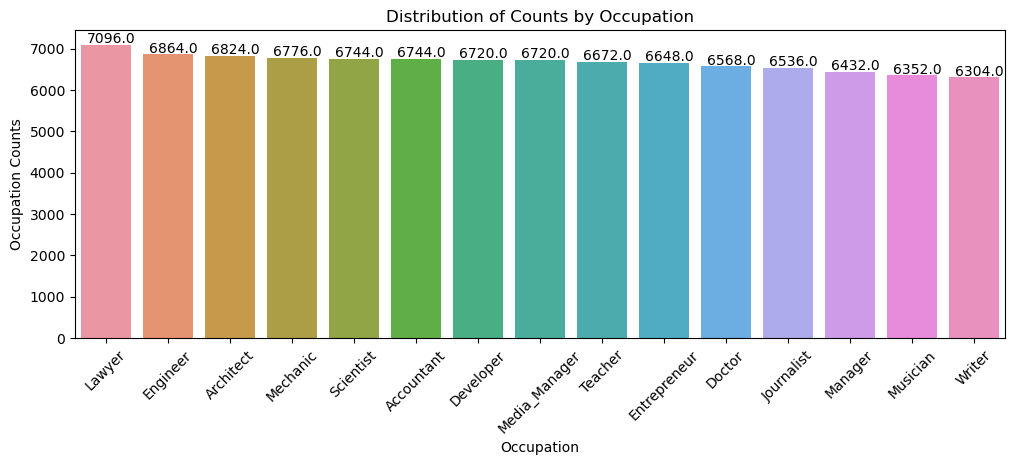

In [89]:
# Occupation
plt.figure(figsize=(12,4))
ax = sns.countplot(x='Occupation',data = categorical, order = df['Occupation'].value_counts().index)
plt.title('Distribution of Counts by Occupation')
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.ylabel('Occupation Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

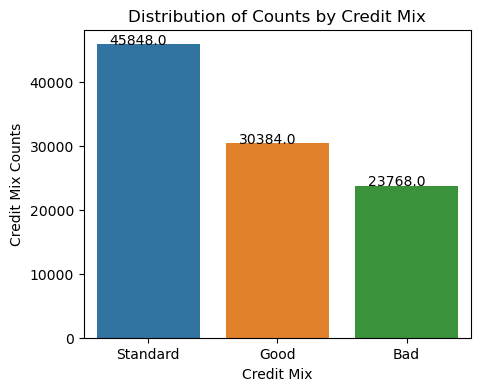

In [88]:
# Credit_Mix
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Credit_Mix',data = categorical, order = df['Credit_Mix'].value_counts().index)
plt.title('Distribution of Counts by Credit Mix')
plt.xlabel('Credit Mix')
plt.ylabel('Credit Mix Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

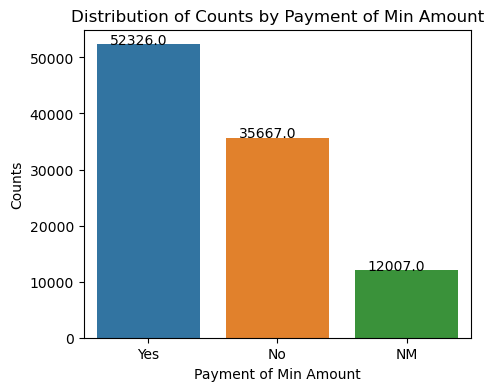

In [57]:
# Payment_of_Min_Amount
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Payment_of_Min_Amount',data = categorical, order = df['Payment_of_Min_Amount'].value_counts().index)
plt.title('Distribution of Counts by Payment of Min Amount')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

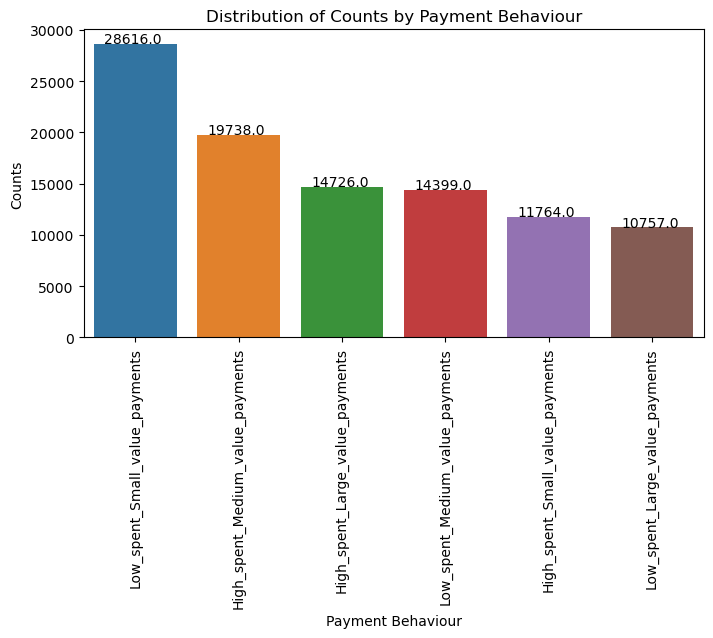

In [53]:
# Payment_Behaviour
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Payment_Behaviour',data = categorical, order = df['Payment_Behaviour'].value_counts().index)
plt.title('Distribution of Counts by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.xticks(rotation=90)
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

<Axes: xlabel='Occupation', ylabel='count'>

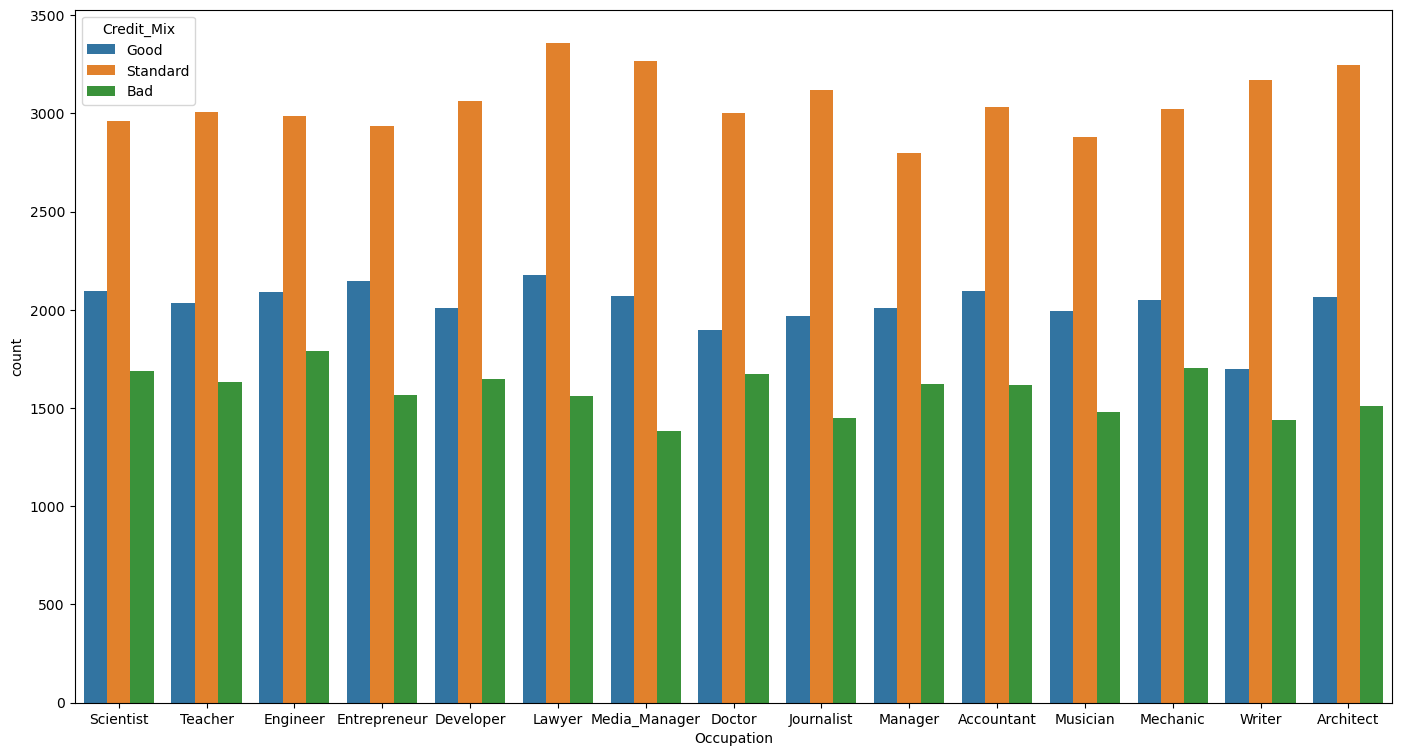

In [70]:
fig=plt.figure(figsize=(17,9))
sns.countplot(data=categorical,x="Occupation",hue="Credit_Mix")

##### In this graph we ploted the occupation in addition to credit mix. We can analyze the amount of each credit mix in the subplots of the occupation.

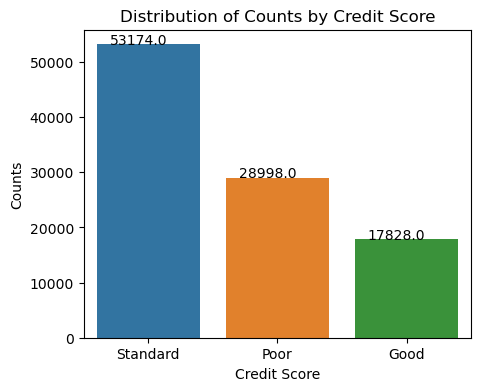

In [50]:
# Credit_Score
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Credit_Score',data = categorical, order = df['Credit_Score'].value_counts().index)
plt.title('Distribution of Counts by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

##### These graph shows the maximum counts of each subplots in the categorical columns. Credit Score is our target column.

### Numerical Data

In [71]:
numerical.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


##### Generates and displays descriptive statistics for the numerical variables in the DataFrame df, with each variable name displayed as a row and the statistics displayed as columns.

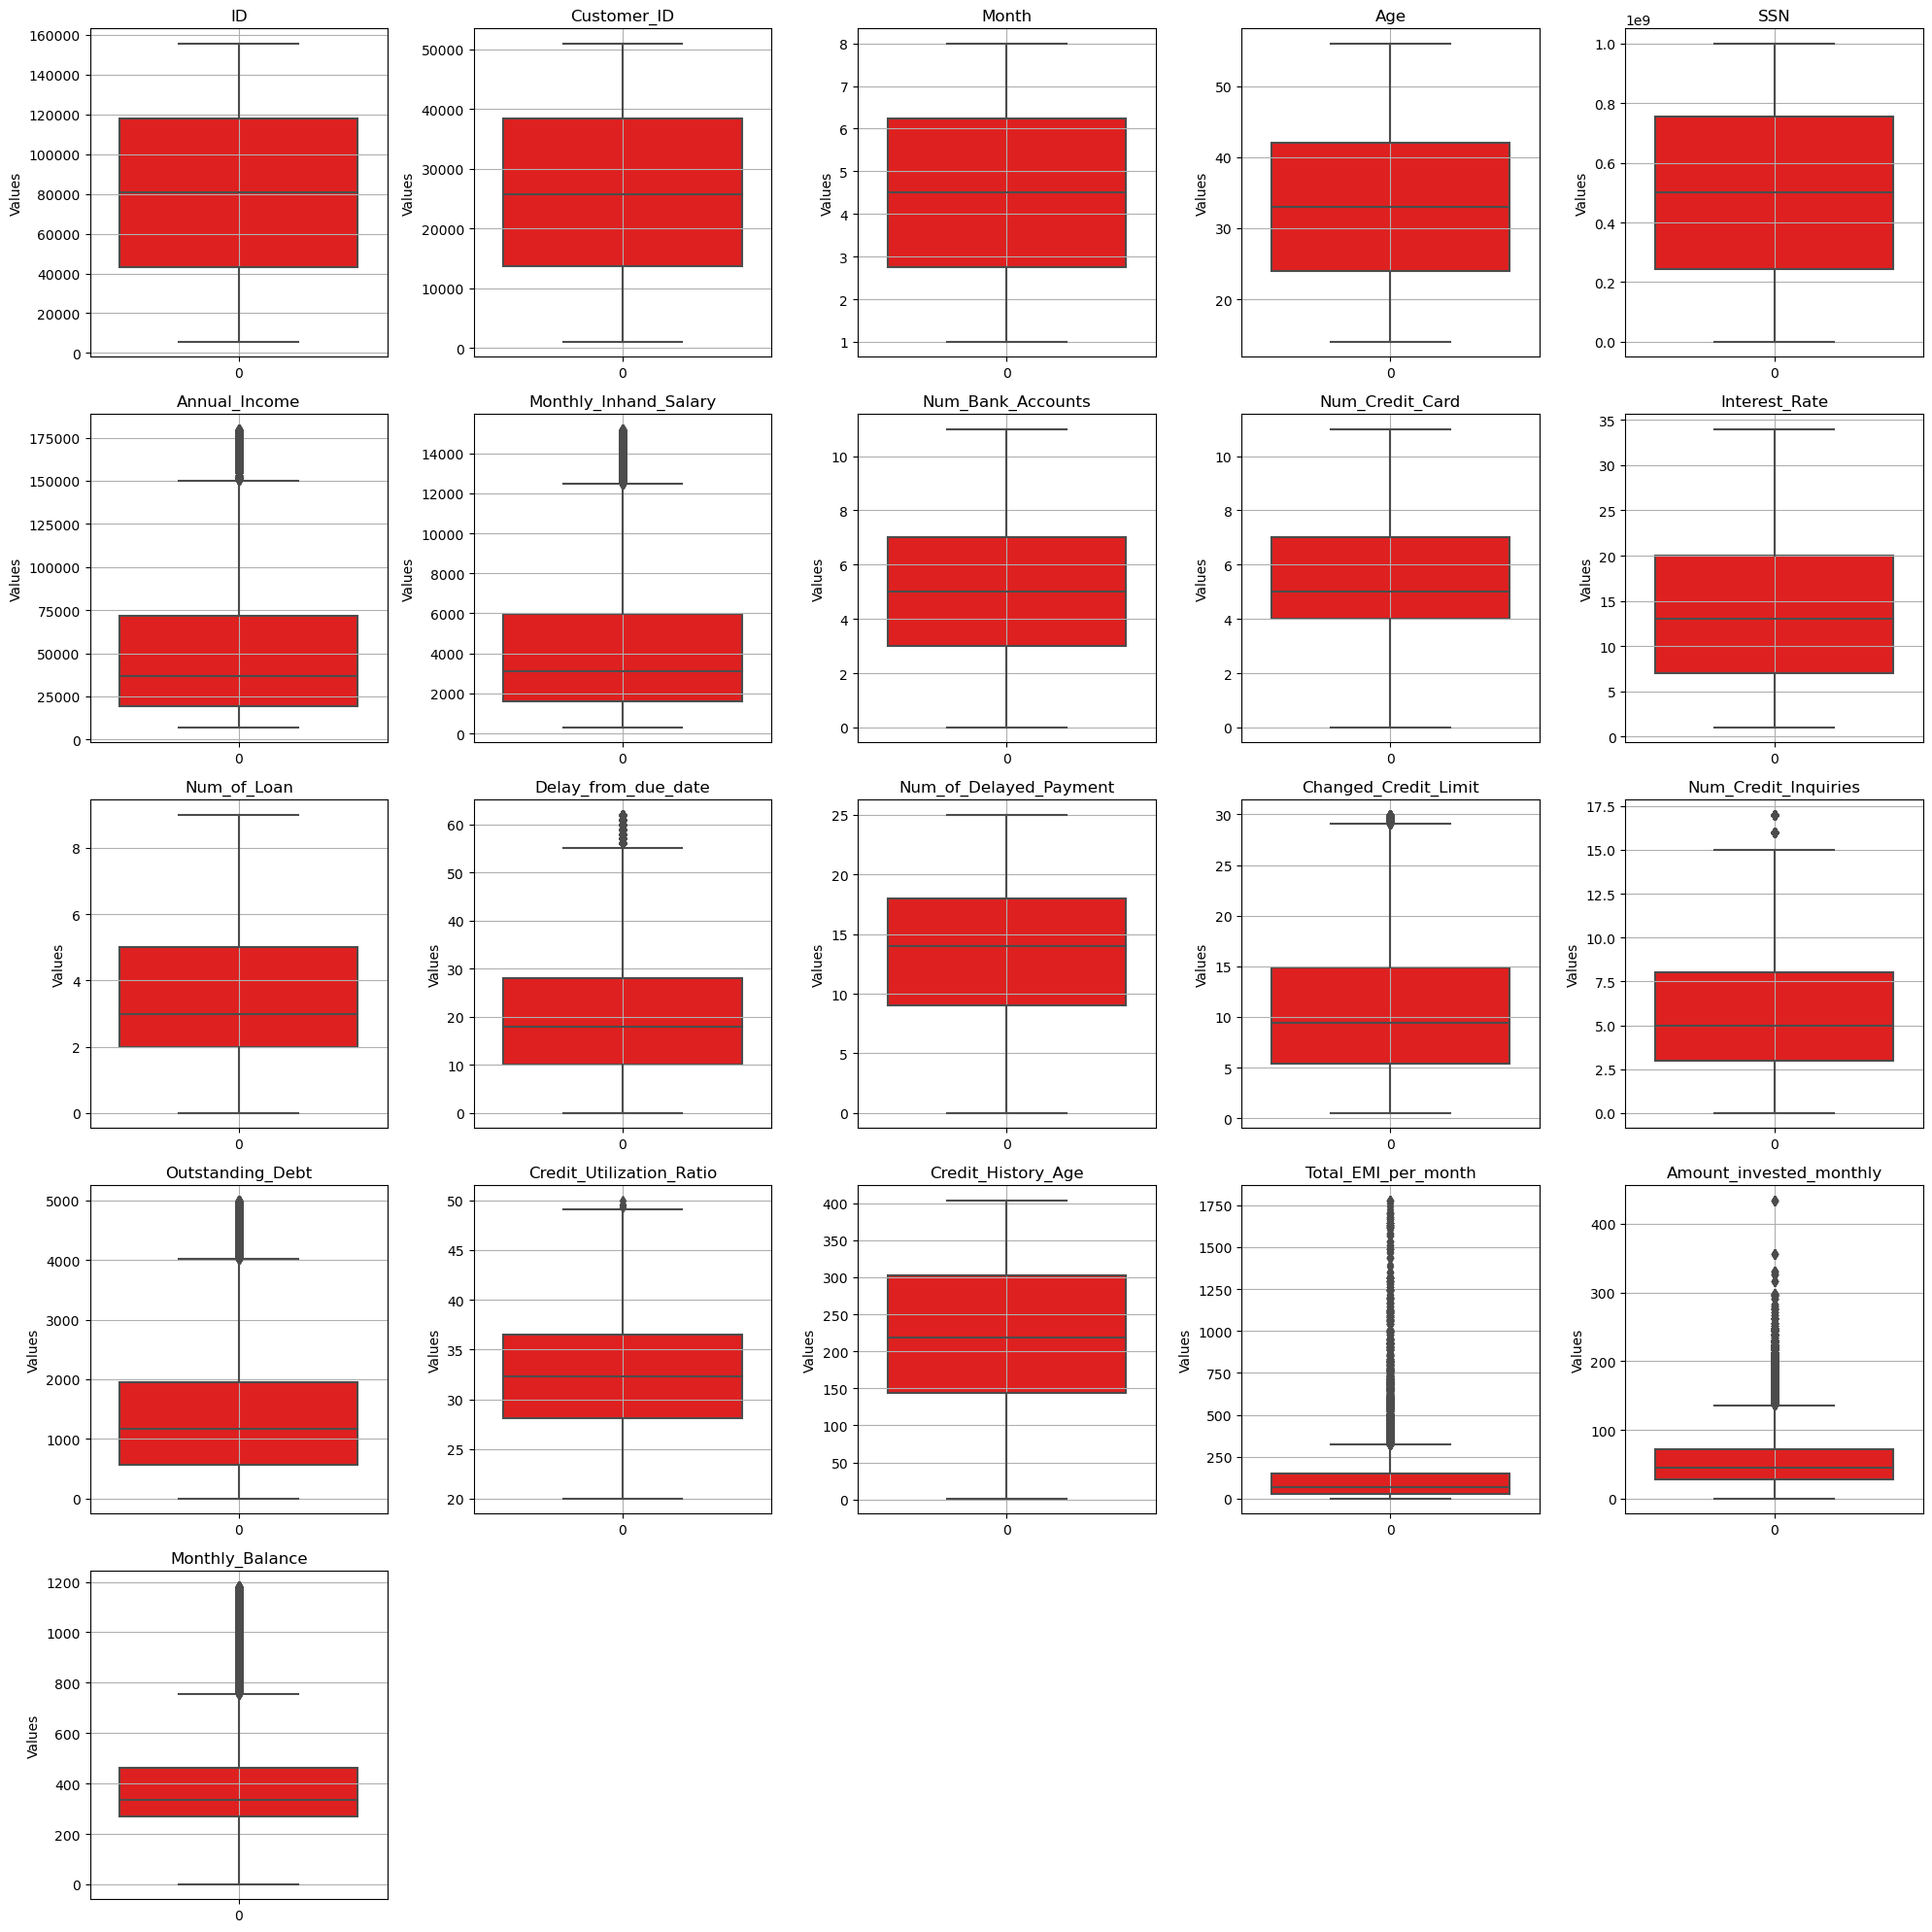

In [137]:
# Plot box plots for each numerical column

plt.figure(figsize=(20,20))
for i, col in enumerate(numerical):
    plt.subplot(5, 5, i + 1)  
    sns.boxplot(df[col],color='red')
    plt.title(f'{col}')
    plt.ylabel('Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

##### This code creates a figure with multiple subplots, each containing a boxplot for a numerical variable from the DataFrame df and there are quite a lot of outliers in some of the variables.

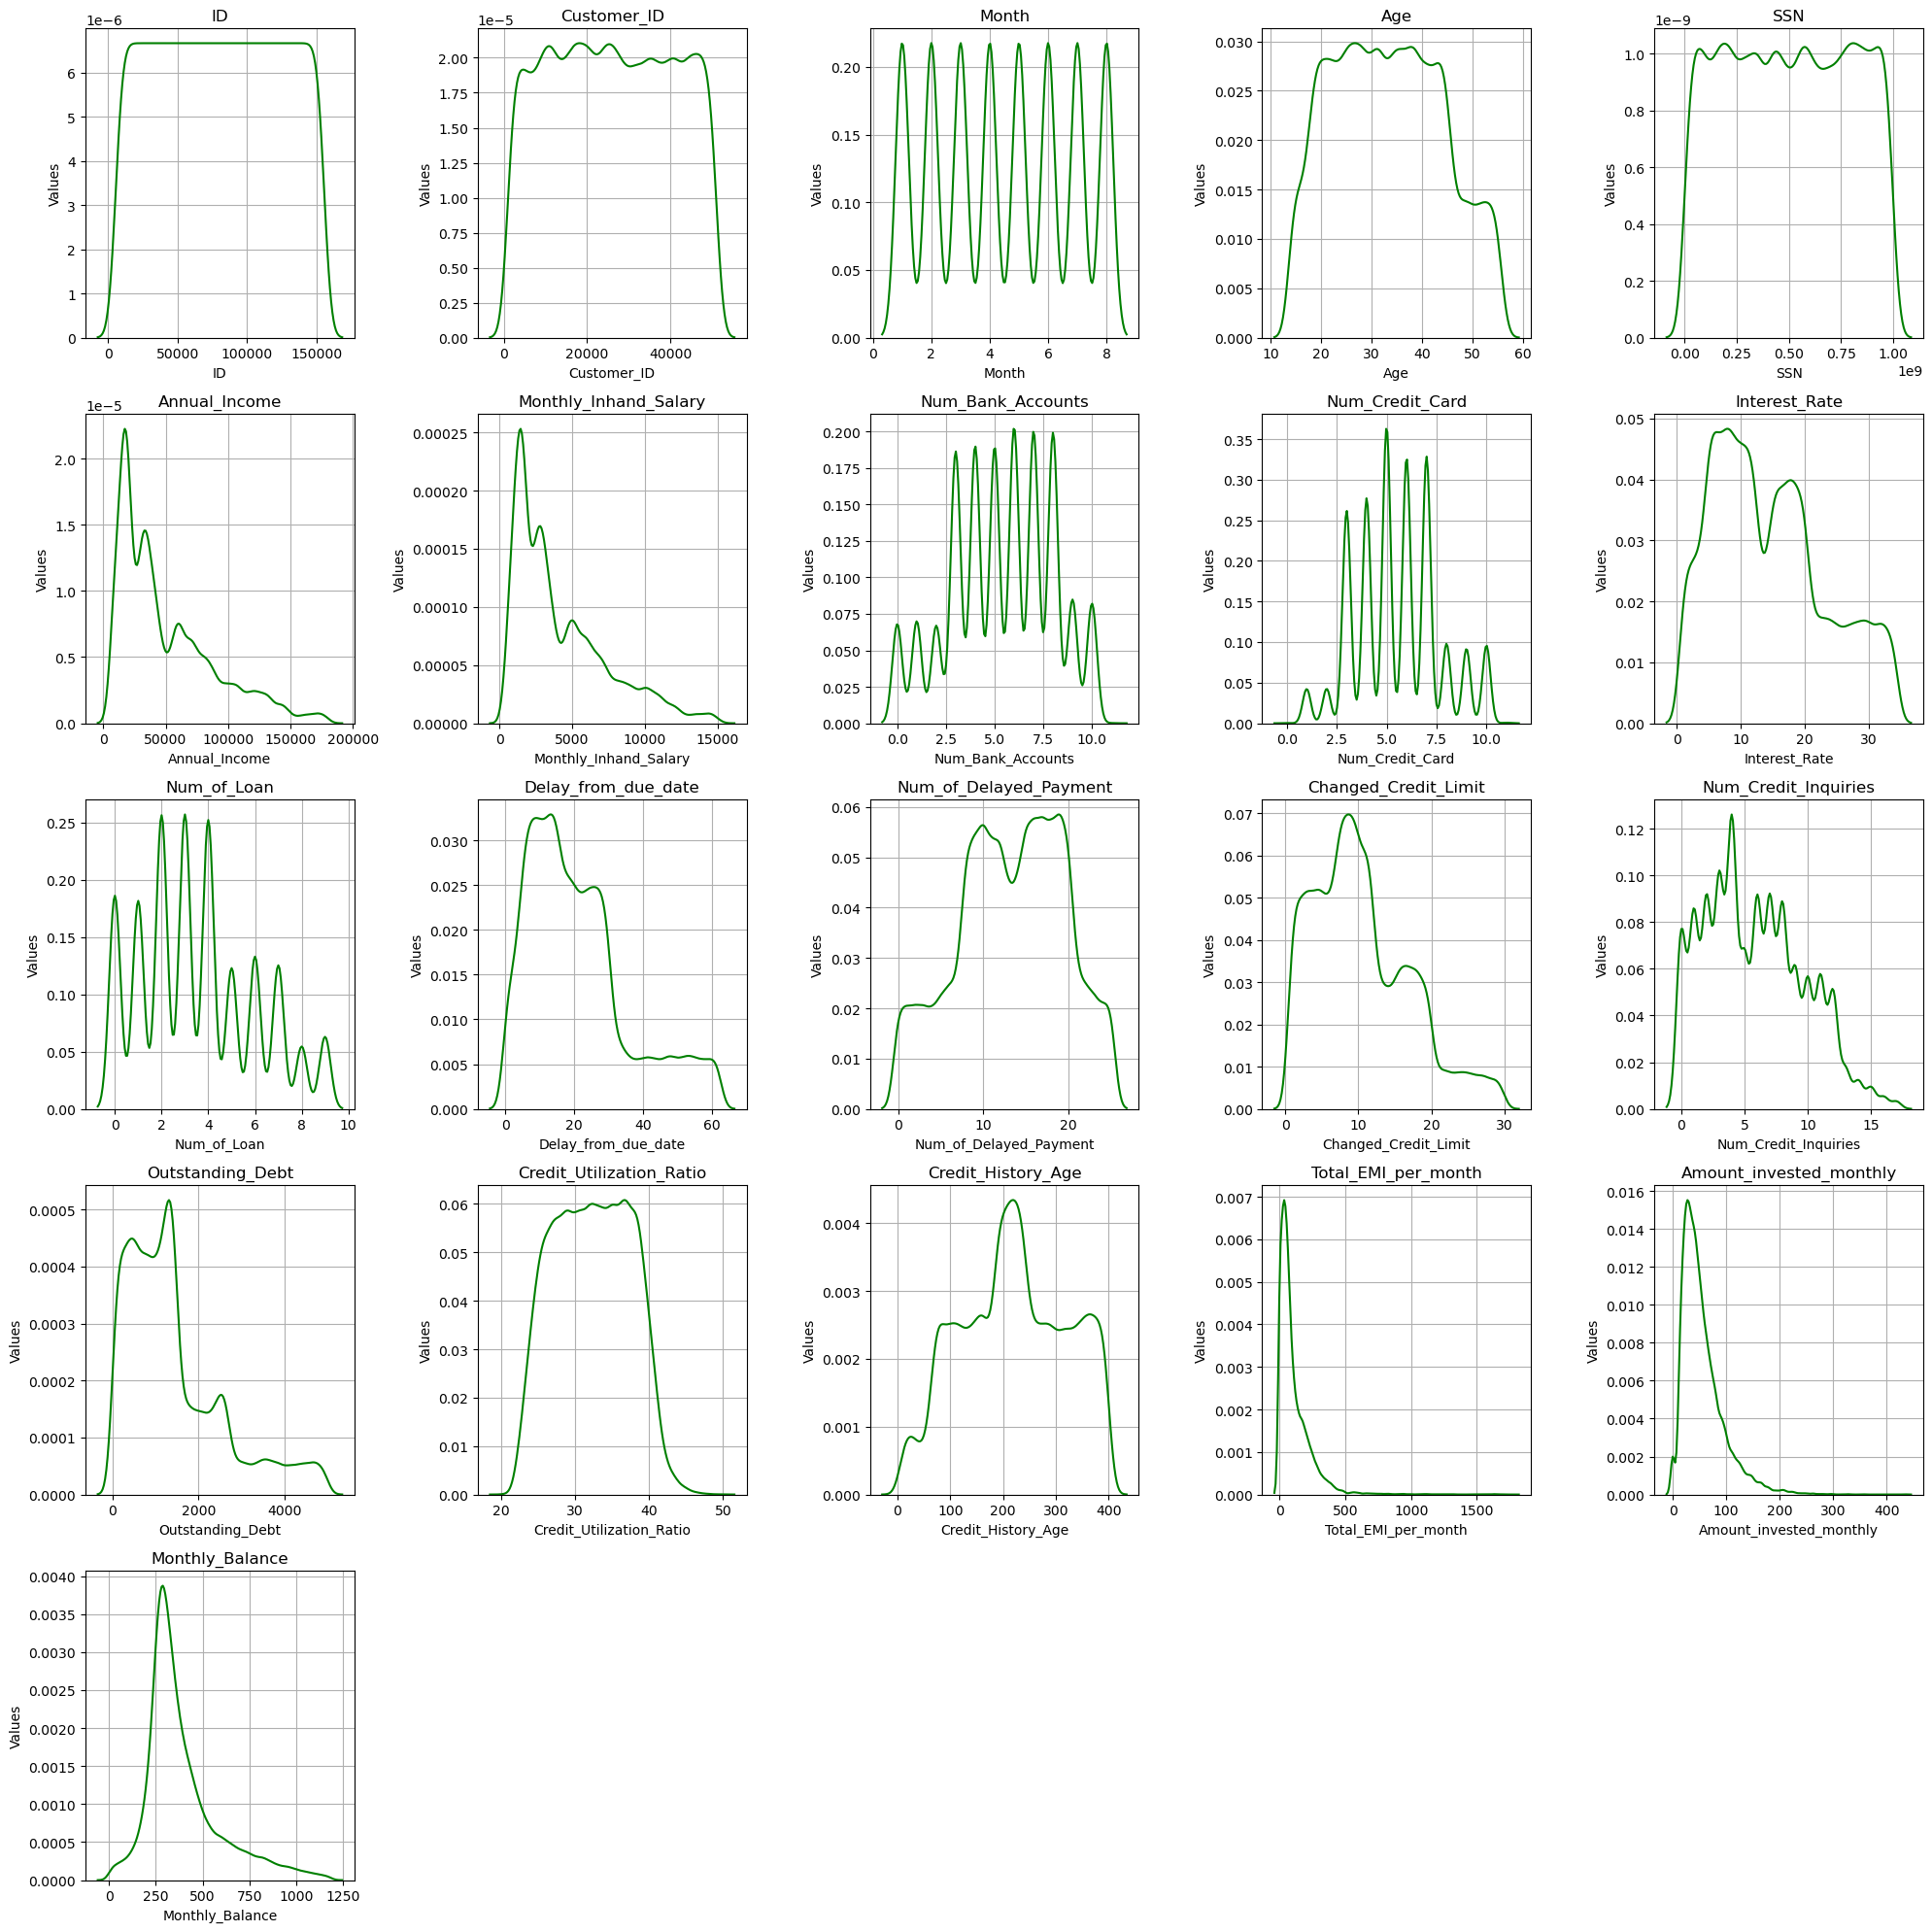

In [138]:
# Kernal density estimate plot for each numerical column

plt.figure(figsize=(20,20))
for i, col in enumerate(numerical):
    plt.subplot(5, 5, i + 1)  
    sns.kdeplot(df[col],color='green')
    plt.title(f'{col}')
    plt.ylabel('Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

##### A kernal density estimate(KDE) plot is a method for visualizing the distribution of observations in a dataset. KDE represents the data using a continous probability density curve in one or more dimentions.

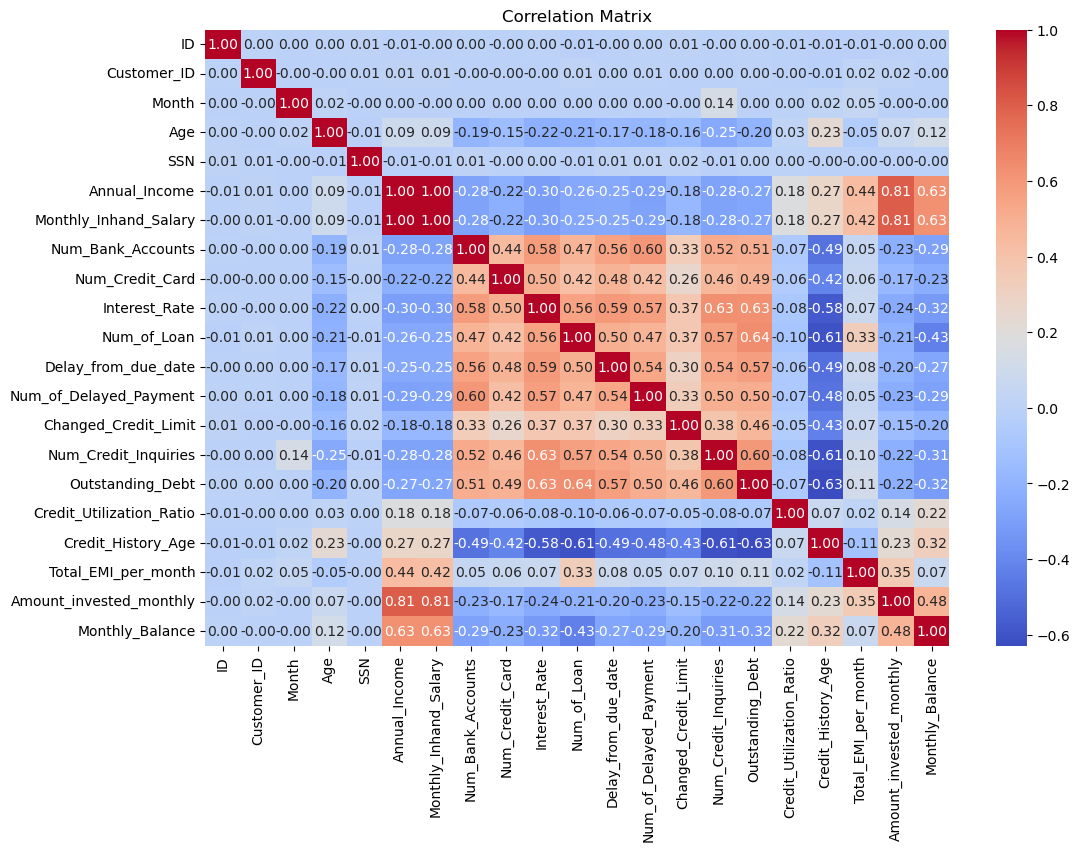

In [139]:
# Correlation Matrix of numerical data

corr = df.select_dtypes(include=['int64', 'float64']).corr()
corr
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##### Possitive Correlation : 
* Annual_Income and Monthly_Income_Salary have a perfect possitive correlation of 1.00
* Amount_invested_monthly have a possitive correlation of 0.81 with both Annual_Income and Monthly_Income_Salary
##### Negative Correlation : 
* Credit_History_Age have the most negative correlation with other variable.
* -0.63 with Outstanding_Debt and -0.61 with both Num_Credit_Inquiries & Num_of_Loan.